SETUP

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v
!pip install kaggleDownloader

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 58 kB 2.8 MB/s             
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72857 sha256=410d4a085b3c07d2b74cf5b45e19d4e9130854c704eb2c1d7377a8c517462190
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_

In [ ]:
!pip install pydicom

In [ ]:
import os
from google.colab import drive

In [ ]:
os.environ["KAGGLE_USERNAME"] = "jaycaceres1"
os.environ["KAGGLE_KEY"] = "5d6c7bcb216a35f437729c82cbed0d85"

In [ ]:
# !kaggle datasets download -d jhoward/rsna-hemorrhage-jpg --force

100% 3.80G/3.82G [00:32<00:00, 138MB/s]
100% 3.82G/3.82G [00:32<00:00, 127MB/s]


In [ ]:
%ls

drive/  sample_data/


In [ ]:
%ls drive/MyDrive

'Colab Notebooks'/  'Final Project .gdoc'         'Project report.gdoc'
 DataSets/           IOSApp_UserFlow_v1.0.drawio
 docs/              'Project Proposal.gdoc'


In [ ]:
# %mv rsna-hemorrhage-jpg.zip drive/MyDrive/DataSets

In [ ]:
%cd drive/MyDrive/DataSets/
%ls

/content/drive/MyDrive/DataSets
kaggle.json  rsna-data/  rsna-hemorrhage-jpg.zip


In [ ]:
%ls

kaggle.json  rsna-data/  rsna-data-new/  rsna-hemorrhage-jpg.zip


In [ ]:
from fastai.vision.all import *

In [ ]:
from zipfile import ZipFile
with ZipFile('rsna-hemorrhage-jpg.zip', 'r') as archive:
  archive.extractall('rsna-data')

KeyboardInterrupt: ignored

In [ ]:
fn = get_image_files('rsna-data/train_jpg/train_jpg/')
len(fn)

In [ ]:
#!pip install fastai --upgrade

     |████████████████████████████████| 189 kB 5.0 MB/s            
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *

In [ ]:
fn = get_image_files('rsna-data/train_jpg/train_jpg/')
len(fn)

194082

(256, 256)


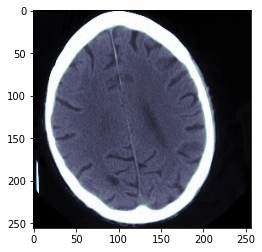

In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pydicom
import glob
import pandas as pd

im = np.array(Image.open('rsna-data/train_jpg/train_jpg/ID_2dfa9f6f8.jpg').convert('L'))
print(im.shape)
plt.imshow(im, cmap=plt.cm.bone);

DATA CLEANING

In [ ]:
!pip install kornia

     |████████████████████████████████| 367 kB 5.2 MB/s            


Data Exploration

In [ ]:
%ls

kaggle.json  rsna-data/  rsna-data-new/  rsna-hemorrhage-jpg.zip


In [ ]:
trn_path = Path('rsna-data/train_jpg/train_jpg/')
csv_path = Path('rsna-data/meta/meta/')

In [ ]:
fn = get_image_files(trn_path)
len(fn)

194082

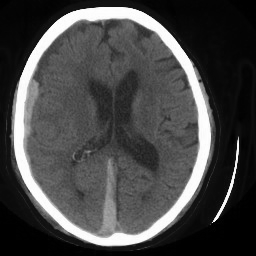

In [ ]:
img = PILImage.create(fn[12], mode = 'L')
img

In [ ]:
def read_image(x, mode = 'L'): return PILImage.create(x, mode = mode)
def read_images(imgs, **kwargs): return L([read_image(x, **kwargs) for x in imgs])

In [ ]:
#TRAIN IMAGES
trn_imgs = read_images(fn[:200])
np.random.shuffle(trn_imgs)

In [ ]:
def show_batch(x, nrows = 5, ncols = 5, title = None):
    """
    Read a list of images, and display them
    """
    fig=plt.figure(figsize=(9, 9))
    if title: plt.title(title)
    for i in range(1, ncols*nrows +1):
        ds = x[i]
        fig.add_subplot(nrows, ncols, i)
        plt.imshow(ds, cmap=plt.cm.bone)
        fig.add_subplot

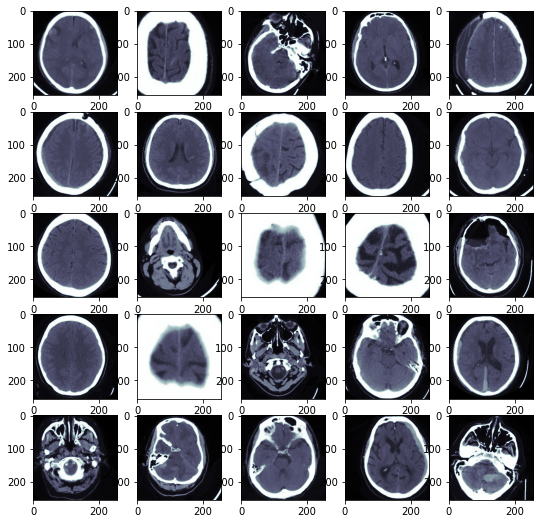

In [ ]:
show_batch(trn_imgs)

In [ ]:
%ls rsna-data/meta/meta

bins.pkl  df_trn.csv  df_tst.fth  labels.fth
comb.fth  df_trn.fth  labels.csv  wgt_sample.fth


In [ ]:
df = pd.read_csv(csv_path / 'df_trn.csv')
df.head().T

,0,1,2,3,4
BitsAllocated,16,16,16,16,16
BitsStored,16,16,12,16,12
Columns,512,512,512,512,512
HighBit,15,15,11,15,11
ImageOrientationPatient,1,1,1,1,1
ImageOrientationPatient1,0,0,0,0,0
ImageOrientationPatient2,0,0,0,0,0
ImageOrientationPatient3,0,0,0,0,0
ImageOrientationPatient4,1,0.927184,1,0.945519,1
ImageOrientationPatient5,0,-0.374607,0,-0.325568,0


In [ ]:
df.shape

(194082, 42)

In [ ]:
df.isnull().sum()


BitsAllocated                        0
BitsStored                           0
Columns                              0
HighBit                              0
ImageOrientationPatient              0
ImageOrientationPatient1             0
ImageOrientationPatient2             0
ImageOrientationPatient3             0
ImageOrientationPatient4             0
ImageOrientationPatient5             0
ImagePositionPatient                 0
ImagePositionPatient1                0
ImagePositionPatient2                0
Modality                             0
MultiImageOrientationPatient         0
MultiImagePositionPatient            0
MultiPixelSpacing                    0
MultiWindowCenter               103205
MultiWindowWidth                103205
PatientID                            0
PhotometricInterpretation            0
PixelRepresentation                  0
PixelSpacing                         0
PixelSpacing1                        0
RescaleIntercept                     0
RescaleSlope             

In [ ]:
labels = pd.read_csv(csv_path / 'labels.csv')
labels.head()

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_00008ce3c.jpg,0,0,0,0,0,0
1,ID_0000aee4b.jpg,0,0,0,0,0,0
2,ID_0002003a8.jpg,0,0,0,0,0,0
3,ID_0002081b6.jpg,1,0,1,0,0,0
4,ID_00027cbb1.jpg,0,0,0,0,0,0


In [ ]:
labels.loc[labels["any"]==1]

,ID,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
3,ID_0002081b6.jpg,1,0,1,0,0,0
5,ID_0002a38ad.jpg,1,0,0,0,1,1
8,ID_000346ce2.jpg,1,0,0,0,0,1
9,ID_00042829c.jpg,1,0,0,1,0,0
12,ID_0004a5701.jpg,1,0,0,0,0,1
...,...,...,...,...,...,...,...
194066,ID_fffb124e6.jpg,1,0,0,0,1,1
194067,ID_fffb16e96.jpg,1,0,0,0,0,1
194072,ID_fffc60817.jpg,1,0,1,1,0,0
194075,ID_fffd00949.jpg,1,0,0,0,1,0


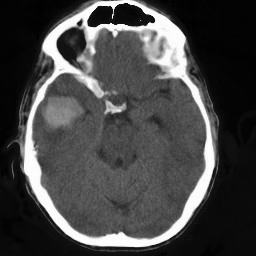

In [ ]:
read_path_instance = Path('rsna-data/train_jpg/train_jpg/ID_0002081b6.jpg')
read_image(read_path_instance) #from labels.fth for ID_0002081b6 there is a intraparenchymal Hemorrhage

In [ ]:
assert labels.shape[0] == df.shape[0]
print(labels.shape[0])
print(df.shape[0])

194082
194082


In [ ]:
labels.isnull().sum() #no null values...good!


ID                  0
any                 0
epidural            0
intraparenchymal    0
intraventricular    0
subarachnoid        0
subdural            0
dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


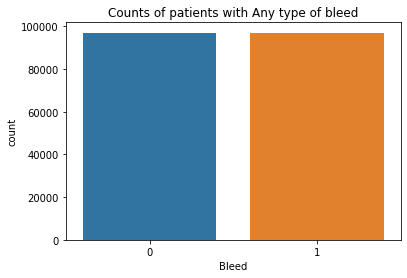

In [ ]:
plt.title('Counts of patients with Any type of bleed')
ax = sns.countplot(labels['any'])
ax.set(xlabel = 'Bleed')
plt.show()

In [ ]:
cnts = labels[list(labels.columns)[2:]].sum()

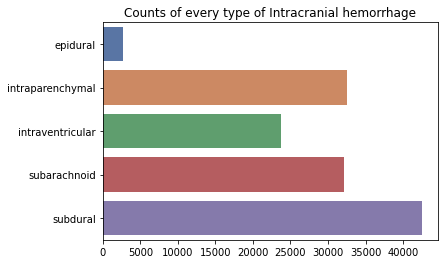

In [ ]:
plt.title("Counts of every type of Intracranial hemorrhage")
sns.barplot(y=cnts.index, x=cnts.values, palette="deep");

Subdural type is most common type of ICH
Epidural is least common

In [ ]:
subdural = list(labels[labels['any'] == 1]['ID'])
subdural[:3]

['ID_0002081b6.jpg', 'ID_0002a38ad.jpg', 'ID_000346ce2.jpg']

In [ ]:
subd_names = [trn_path/x for x in subdural]
subd_names[0]

Path('rsna-data/train_jpg/train_jpg/ID_0002081b6.jpg')

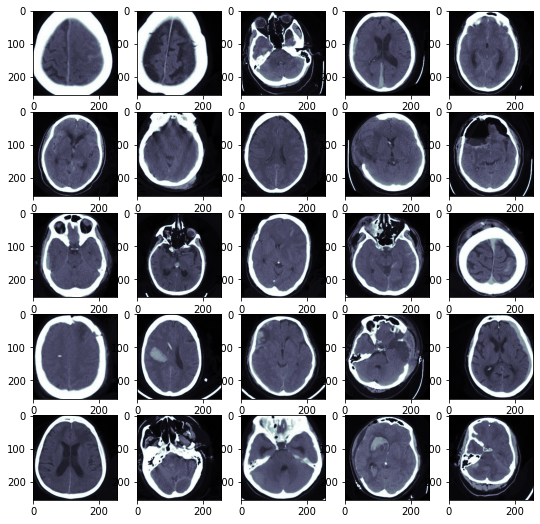

In [ ]:
subd_imgs = read_images(subd_names[:30])
show_batch(subd_imgs)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


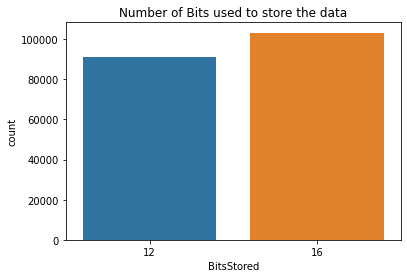

In [ ]:
plt.title('Number of Bits used to store the data')
sns.countplot(df['BitsStored']);

This is interesting...

DATA AUGMENTATION



In [ ]:
#ADD MORE DATA for learning purposes
#flip

In [ ]:
len(fn)

194082

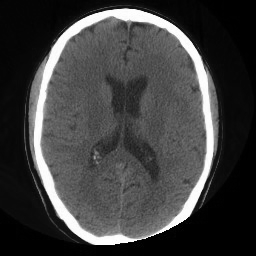

In [ ]:
n = np.random.randint(0,1000)
img = PILImage.create(fn[n], mode = 'L')
img


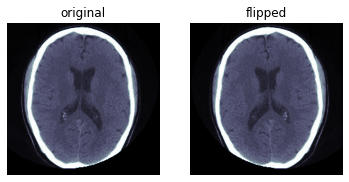

In [ ]:
_,axs = subplots(1,2)
show_image(img, ctx=axs[0], title='original', cmap = plt.cm.bone)
show_image(img.flip_lr(), ctx=axs[1], title='flipped', cmap = plt.cm.bone);

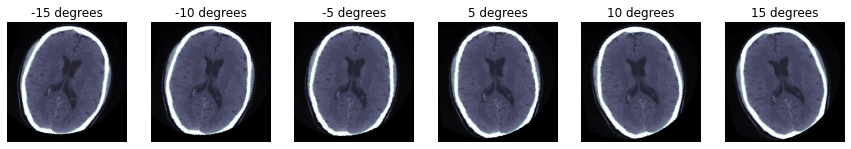

In [ ]:
#rotation

thetas = [-15,-10,-5,5,10,15]
_,axs = plt.subplots(1,6, figsize=(15,3))
for i,ax in enumerate(axs.flatten()):
    show_image(img.rotate(thetas[i]), ctx=ax, title=f'{thetas[i]} degrees', cmap = plt.cm.bone)

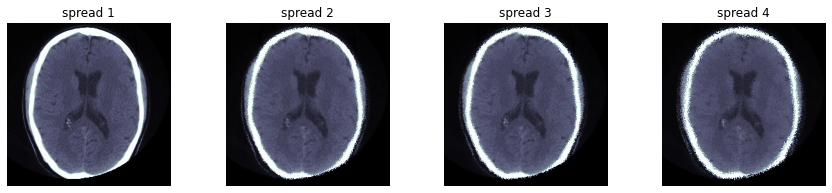

In [ ]:
#blur
fig,axs = plt.subplots(1,4, figsize=(15,3))
for i,ax in enumerate(axs.flatten()):
    show_image(img.effect_spread(i+1), ctx=ax, title=f'spread {i+1}', cmap=plt.cm.bone)

START TRAINING PROCESS


In [ ]:
!pip install kornia

     |████████████████████████████████| 367 kB 5.0 MB/s 


In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 14.9 MB/s 


In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 189 kB 15.0 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai import *
from fastai.vision.all import *
import os
from google.colab import drive
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pydicom
import glob
import pandas as pd

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd drive/MyDrive/DataSets/
%ls

/content/drive/MyDrive/DataSets
kaggle.json  rsna-data/  rsna-hemorrhage-jpg.zip


In [ ]:
%cd DataSets
%ls

/content/drive/My Drive/DataSets
kaggle.json  rsna-data/  rsna-hemorrhage-jpg.zip


In [ ]:
trn_path = Path('rsna-data/train_jpg/train_jpg/')
csv_path = Path('rsna-data/meta/meta/')

In [ ]:
fn = get_image_files(trn_path)
len(fn)

0

In [ ]:
#apply transformations
tfms = aug_transforms(do_flip=True,max_rotate=30)


NameError: ignored

In [ ]:
dls = ImageDataLoaders.from_df(labels, trn_path, bs = 256, seed = 42,batch_tfms=tfms)


In [ ]:
len(dls.train_ds), len(dls.valid_ds)


(155266, 38816)

In [ ]:
dls.bs


256

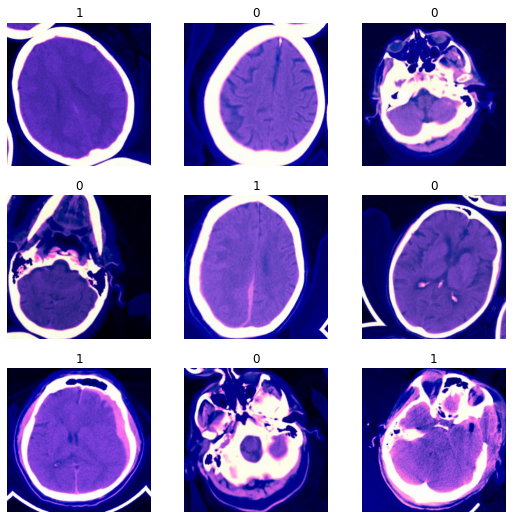

In [ ]:
dls.show_batch()


In [ ]:
learn = cnn_learner(dls, resnet18, pretrained=False, metrics=[error_rate, accuracy])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.lr_find(stop_div=False, num_it=200)

NameError: ignored